In [88]:
for i in range(21):
    raw = pd.read_csv(r'C:\Users\com\[MSB535]\data\Breau Data\{}\{}.csv'.format(2000+i,2000+i))
    raw['YEAR'] = 2000+i
    raw = raw.drop([raw.columns[7]], axis = 1)
    if i == 0 :
        data = raw
    else:
        data = pd.concat([data,raw]) 
data.to_csv(r'C:\Users\com\[MSB535]\data\Breau Data\Data.csv')

In [79]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '8944',
'smlID': '1161436',
'header': 'DAL Historical Data',
'st_date': '01/01/2000',
'end_date': '12/31/2019',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
result = requests.post(url, headers = head, data = payload)
result.status_code
temp = BeautifulSoup(result.text)
stockdata = pd.read_html(str(temp.find('table')))[0]
for i in range(len(stockdata['Date'])):
    if stockdata['Date'][i].split()[0] == 'Jan':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 01. 25.'
    elif stockdata['Date'][i].split()[0] == 'Feb':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 02. 25.'
    elif stockdata['Date'][i].split()[0] == 'Mar':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 03. 25.'
    elif stockdata['Date'][i].split()[0] == 'Apr':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 04. 25.'
    elif stockdata['Date'][i].split()[0] == 'May':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 05. 25.'
    elif stockdata['Date'][i].split()[0] == 'Jun':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 06. 25.'
    elif stockdata['Date'][i].split()[0] == 'Jul':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 07. 25.'
    elif stockdata['Date'][i].split()[0] == 'Aug':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 08. 25.'
    elif stockdata['Date'][i].split()[0] == 'Sep':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 09. 25.'
    elif stockdata['Date'][i].split()[0] == 'Oct':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 10. 25.'
    elif stockdata['Date'][i].split()[0] == 'Nov':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 11. 25.'
    elif stockdata['Date'][i].split()[0] == 'Dec':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 12. 25.'
stockdata.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\stock_Delta.xlsx')

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import traceback
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data =pd.read_csv(r'C:\Users\com\[MSB535]\data\Breau Data\Data.csv')

In [3]:
company_name = []
for keys in data['UNIQUE_CARRIER_NAME']:
    if keys in company_name :
        continue
    else :
        company_name.append(keys)            

In [4]:
company = 'Delta Air Lines Inc.'
savename= 'Deltaair'

In [5]:
info = []
threeones = ['1','3','5','7','8','10','12']
thirtys = ['4','6','9','11']
twoeights = ['2']
year = 2000
month = 1
is_company = data['UNIQUE_CARRIER_NAME'] == company
for i in range(21):
    month = 1
    for j in range(12):
        is_month = data['MONTH'] == month
        is_year = data['YEAR'] == year
        classifier = is_company & is_month & is_year
        passengers = data[classifier]['PASSENGERS'].sum()
        freight = data[classifier]['FREIGHT'].sum() + data[classifier]['MAIL'].sum()
        if str(month) in twoeights:
            date = str(year)+'. 0'+str(month)+'. 25.'
        elif str(month) in thirtys:
            if len(str(month)) == 1:
                date = str(year)+'. 0'+str(month)+'. 25.'
            else:
                date = str(year)+'. '+str(month)+'. 25.'
        elif str(month) in threeones:
            if len(str(month)) == 1:
                date = str(year)+'. 0'+str(month)+'. 25.'
            else:
                date = str(year)+'. '+str(month)+'. 25.'
        info.append([company, year, month, date, passengers, freight])
        month += 1
    year += 1
temp = pd.DataFrame(info,columns = ['Company','Year','Month','Date','Passenger','Freight'])
table = temp[temp['Passenger']!=0]
globals()['table_{}'.format(savename)]=table

In [6]:
stockdata =pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\stock_Delta.xlsx')

In [9]:
year = 20
while True:
    if year == 0:
        break
    count = 0
    for i in range(len(stockdata['Date'])):
        if stockdata['Date'][i].split()[0].rstrip('.')[2:4].lstrip('0') == str(year):
            count +=1
    if count < 12:
        print('Year of ' + str(year)+' has lower month by '+str(count))
    year = year-1

Year of 20 has lower month by 0
Year of 7 has lower month by 8
Year of 6 has lower month by 0
Year of 5 has lower month by 0
Year of 4 has lower month by 0
Year of 3 has lower month by 0
Year of 2 has lower month by 0
Year of 1 has lower month by 0


In [10]:
floated = []
for i in range(len(stockdata['Change %'])):
    floated.append(float(stockdata['Change %'].values[i].rstrip('%')))
stockdata['Change(float)'] = floated

In [11]:
newdate = []
for i in range(len(table_Deltaair['Date'])):
    date = ''
    for j in range(len(table_Deltaair['Date'][i].split())):
        if j == 2:
            date += table_Deltaair['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += table_Deltaair['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
table_Deltaair['newdate'] = newdate
temp = table_Deltaair[table_Deltaair['Year']<2020]
table_Deltaair = temp

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100,colors = 'color'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=colors)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0,len(x),step = 30),x[np.arange(0,len(x),step = 30)])
    plt.show()

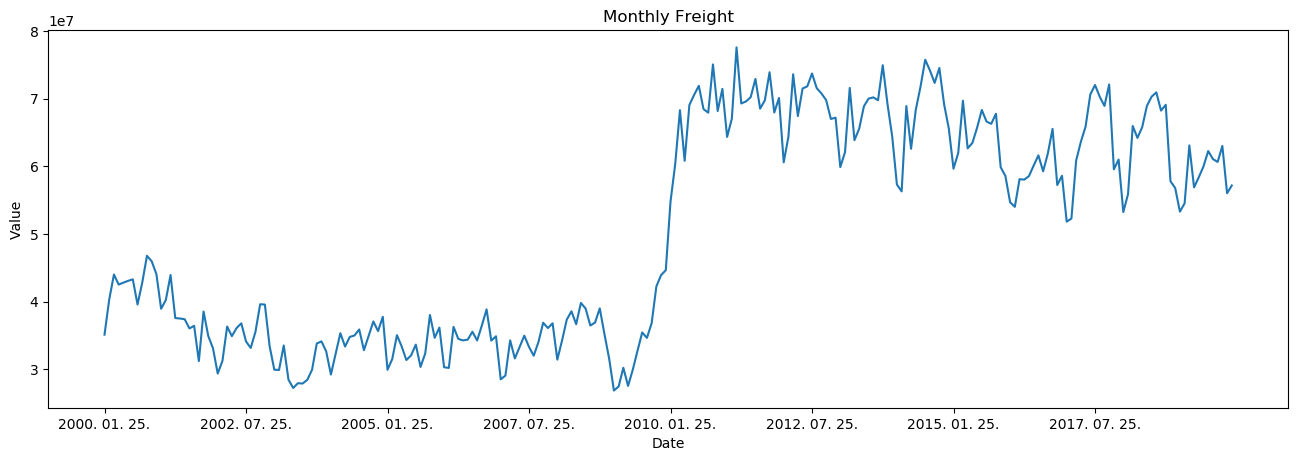

In [13]:
what = 'Freight'
ts_Deltaair = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['Date'],columns = [what])
plot_df(ts_Deltaair, x=ts_Deltaair.index, y=ts_Deltaair[what].values, title='Monthly {}'.format(what), colors = 'tab:Blue')


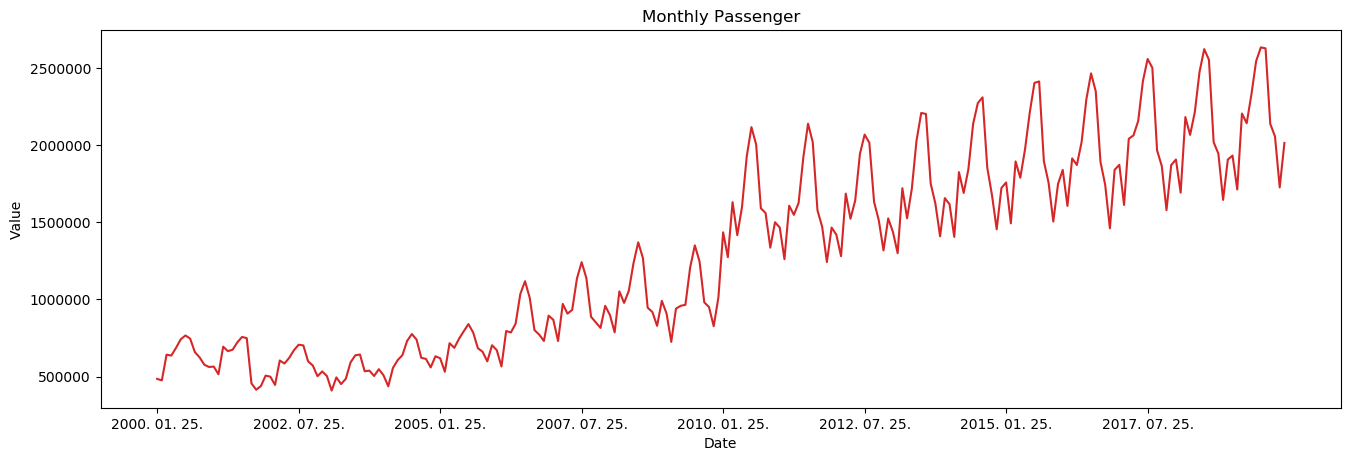

In [14]:
what = 'Passenger'
ts_Deltaair = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['Date'],columns = [what])
plot_df(ts_Deltaair, x=ts_Deltaair.index, y=ts_Deltaair[what].values, title='Monthly {}'.format(what), colors = 'tab:red')

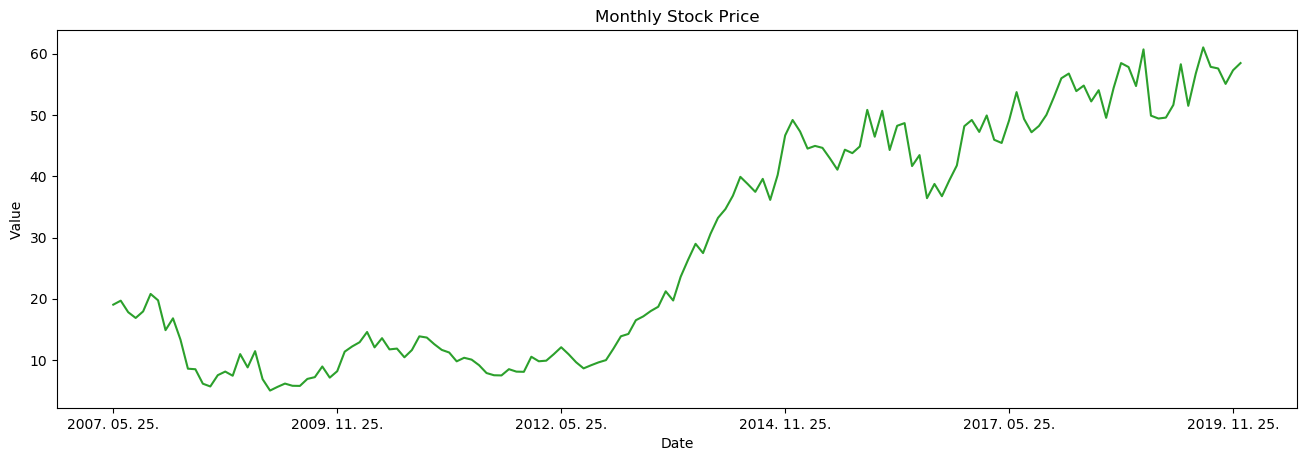

In [15]:
what = 'Price'
#Price or Change(float'
stock_Deltaair = pd.DataFrame(stockdata.loc[::-1][what].values,index = stockdata.loc[::-1]['Date'],columns = [what])
plot_df(stock_Deltaair, x=stock_Deltaair.index, y=stock_Deltaair[what].values, title='Monthly Stock Price',colors = 'tab:Green')

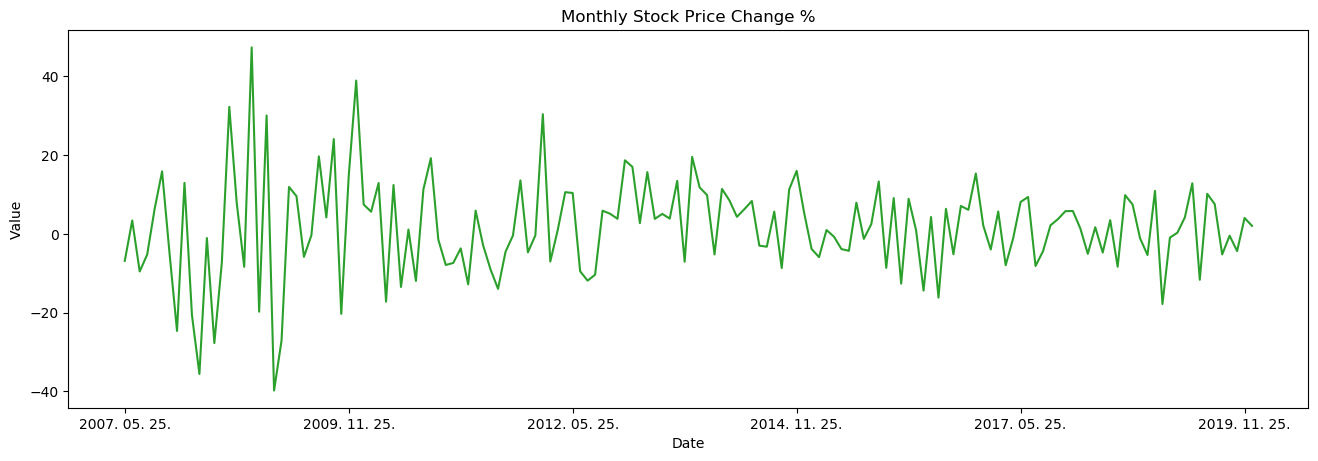

In [16]:
what = 'Change(float)'
#Price or Change(float)'
stock_Deltaair = pd.DataFrame(stockdata.loc[::-1][what].values,index = stockdata.loc[::-1]['Date'],columns = [what])
plot_df(stock_Deltaair, x=stock_Deltaair.index, y=stock_Deltaair[what].values, title='Monthly Stock Price Change %',colors = 'tab:Green')

In [17]:
import statsmodels.api as sm
from datetime import datetime
from pylab import rcParams

In [18]:
datetime = []
for i in range(len(table_Deltaair['newdate'])):
    datetime.append(pd.to_datetime(table_Deltaair['newdate'][i], format='%Y-%m-%d'))
table_Deltaair['datetime'] = datetime

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


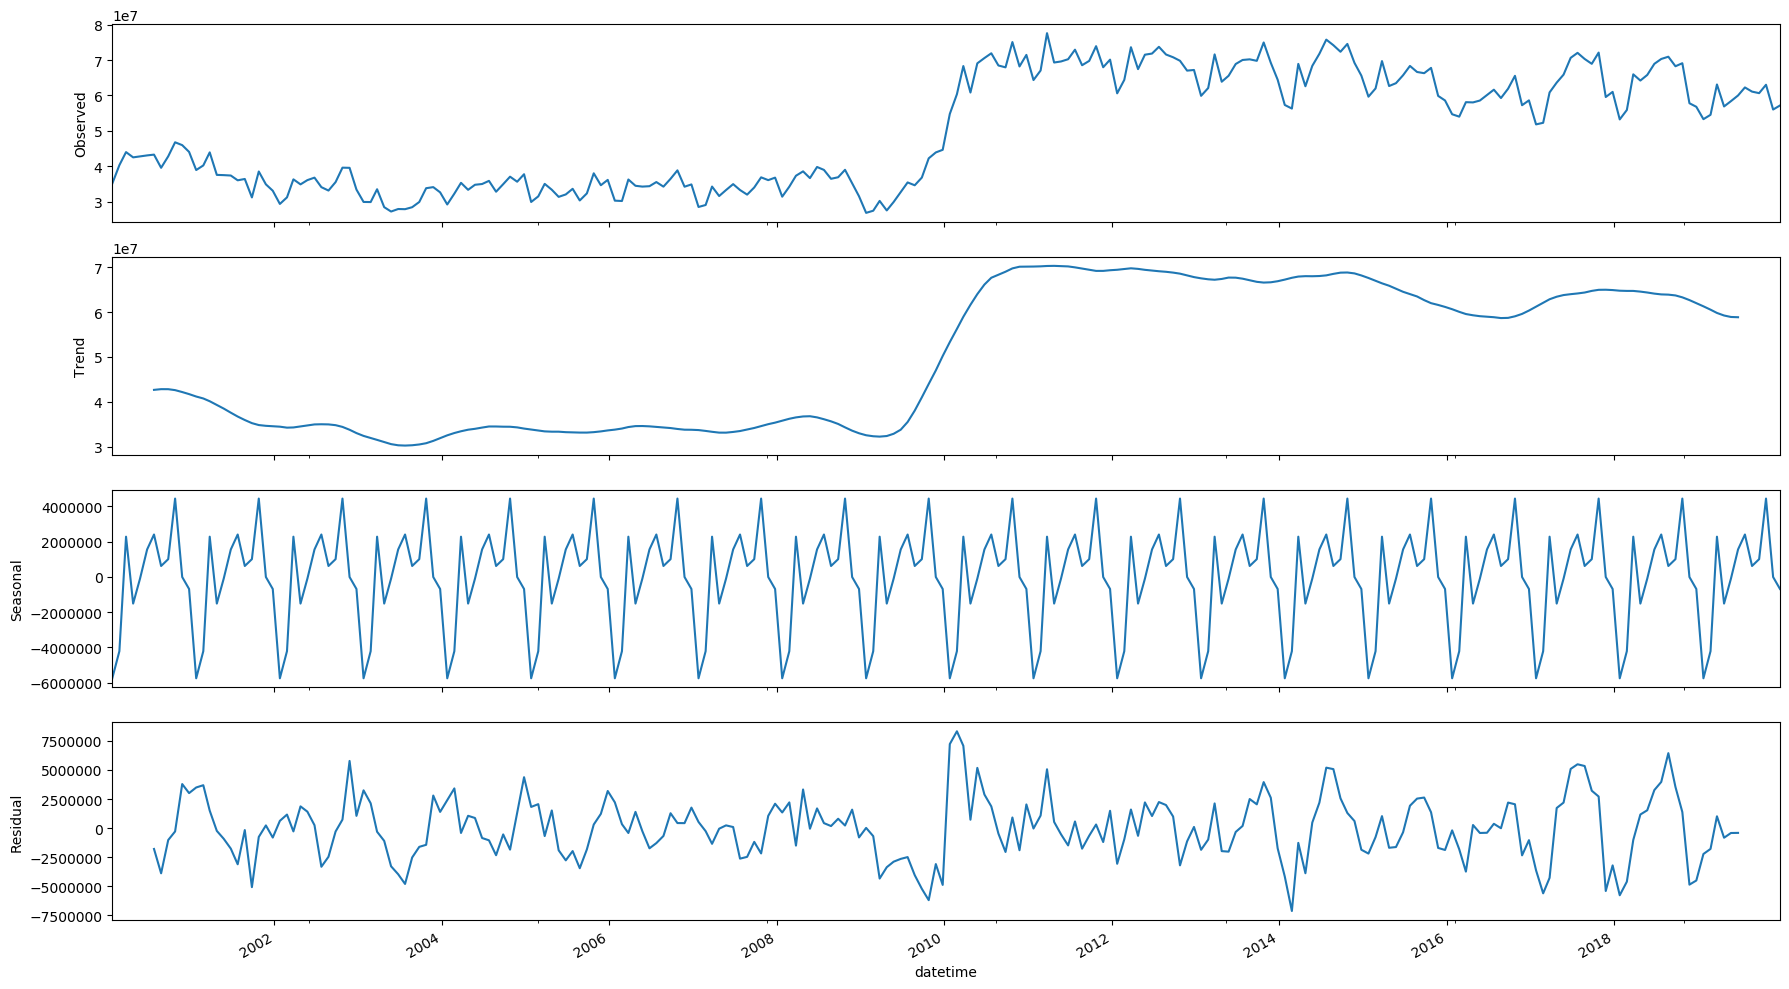

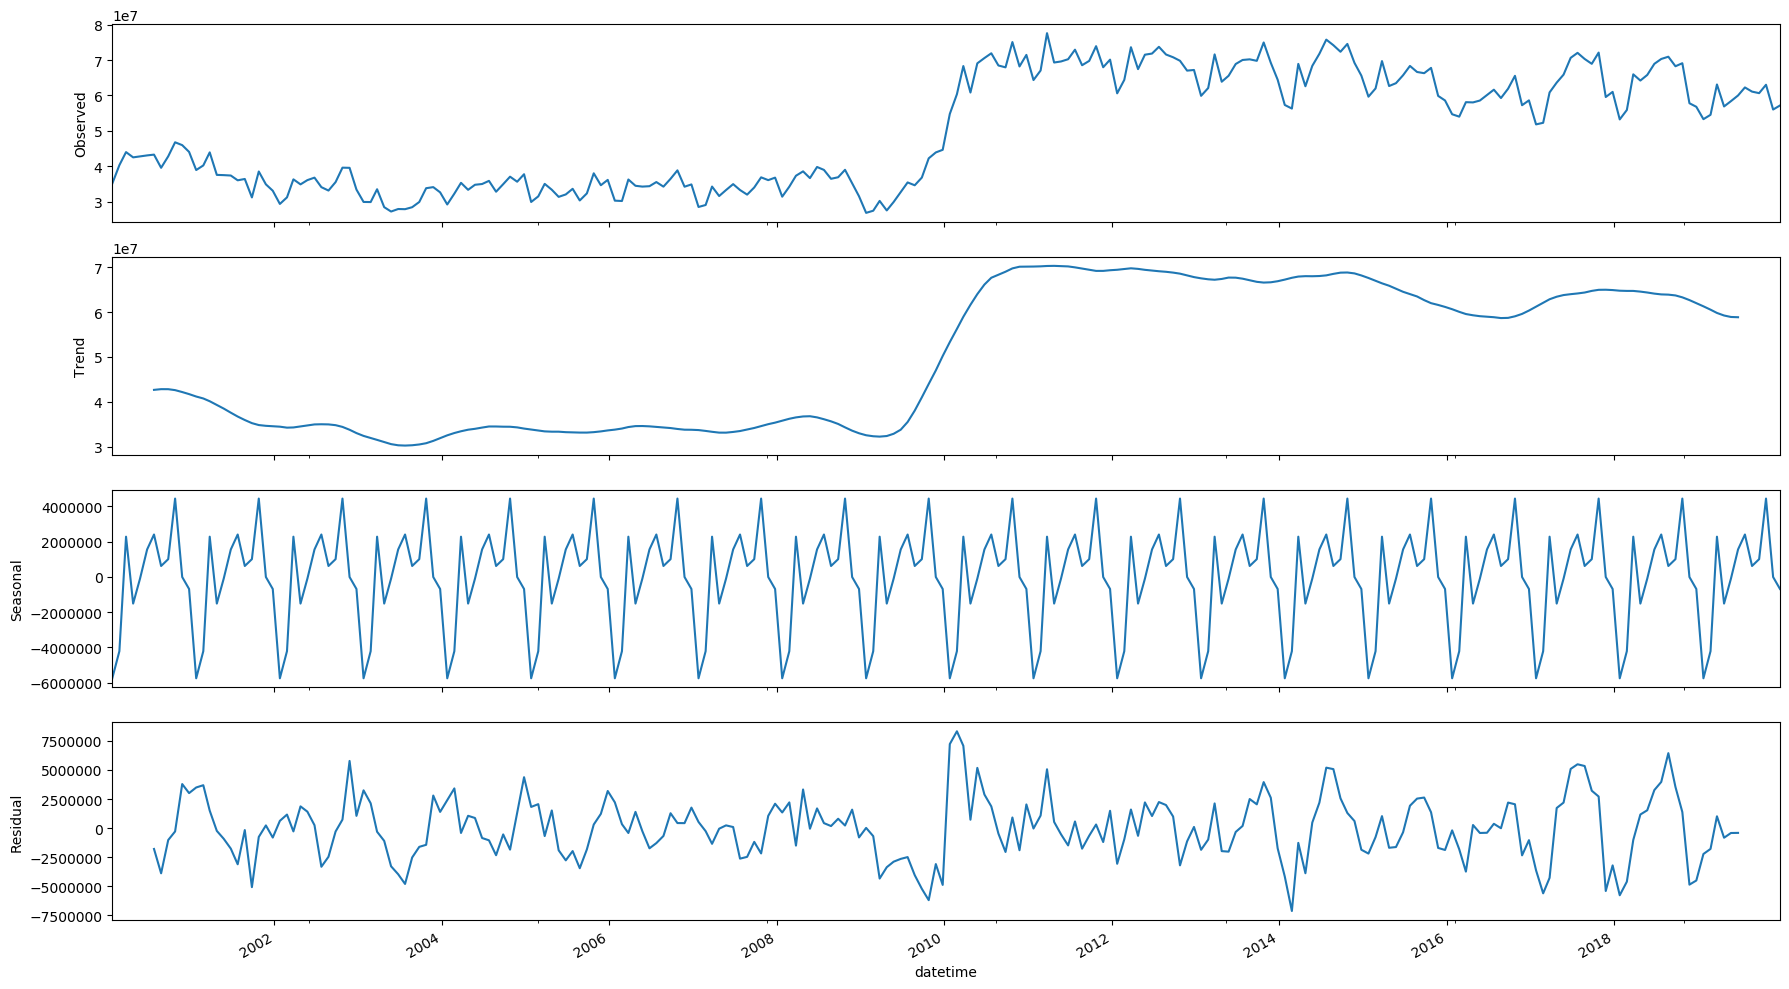

In [19]:
what = 'Freight'
temp = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['datetime'],columns = [what])
ts_Deltaair = temp[temp[what] !=0]
rcParams['figure.figsize'] = 18, 10
rcParams['figure.dpi'] = 100
decomposition = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12)
decomposition.plot()

In [20]:
temp = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12).trend
table_trend = temp[temp[what].notnull()]
newdate = []
for i in range(len(stockdata['Date'])):
    date = ''
    for j in range(len(stockdata['Date'][i].split())):
        if j == 2:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
stockdata['newdate'] = newdate
datetime = []
for i in range(len(stockdata['Date'])):
    datetime.append(pd.to_datetime(stockdata['newdate'][i], format='%Y-%m-%d'))
stockdata['datetime'] = datetime
stockdata.head()
price = []
date = []
for i in range(len(table_trend)):
    if stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].size != 0:
        price.append(stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].values)          
        date.append(table_trend.index[i])
chart_info = pd.DataFrame(price, index = date, columns = ['Price'])
chart_info[what] = table_trend[what]
chart_info.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\{} {}.xlsx'.format(company,what))

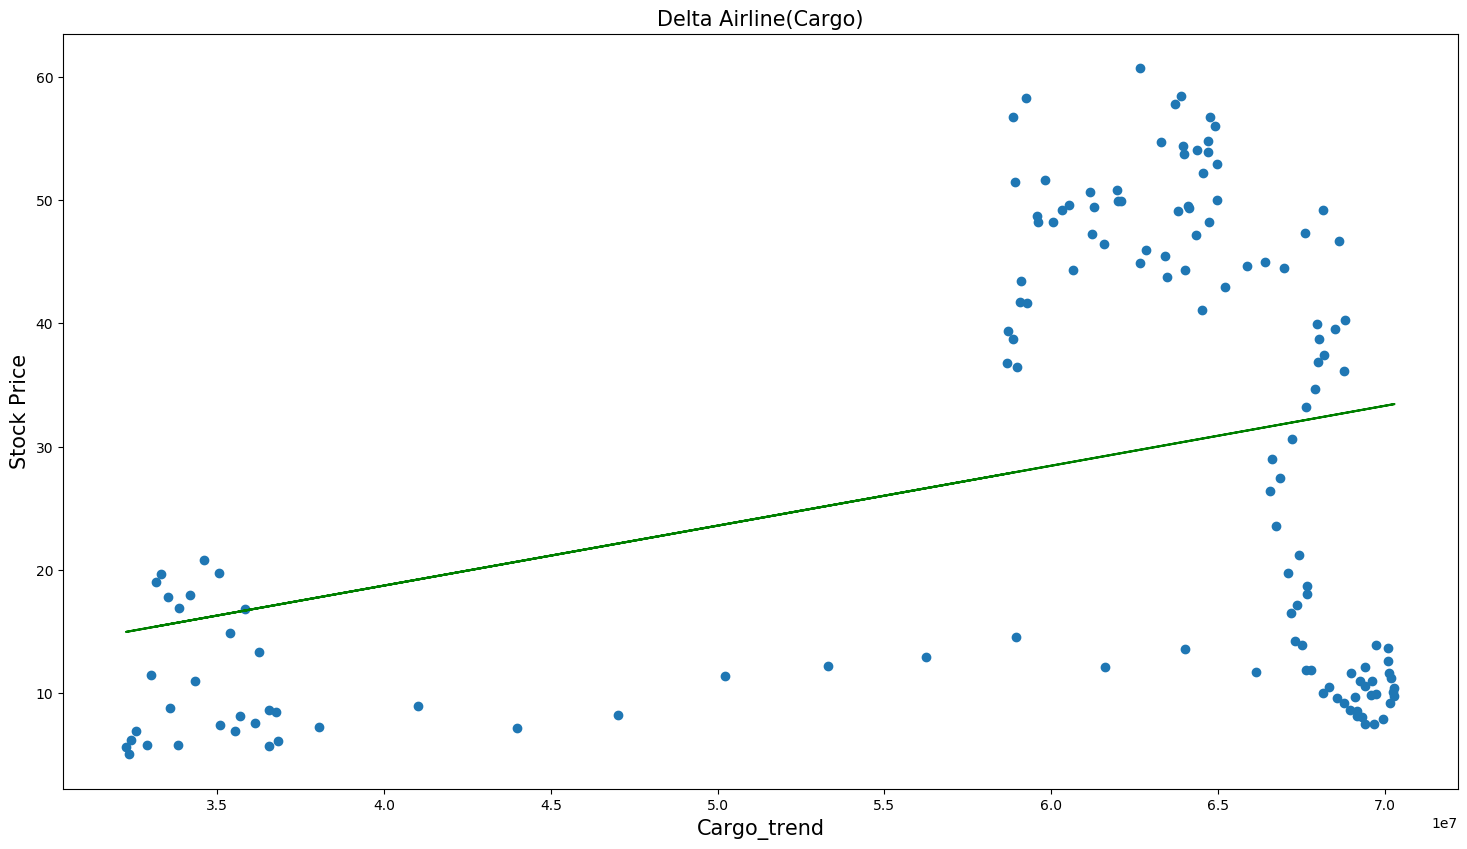

In [21]:
line = LinearRegression()
y_value = chart_info['Price']
x_value = chart_info[what].values
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('Delta Airline(Cargo)', fontsize = 15)
plt.xlabel('Cargo_trend', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [22]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     18.62
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           2.95e-05
Time:                        21:48:29   Log-Likelihood:                -622.53
No. Observations:                 146   AIC:                             1249.
Df Residuals:                     144   BIC:                             1255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7207      6.784     -0.106      0.916     -14.130      12.689
x1          4.862e-07   1.13e-07      4.315      0.000    2.63e-07    7.09e-07
==============================================================================
Omnibus:                      227.657   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.108
Skew:                           0.059   Prob(JB):                      0.00235
Kurtosis:                       1.594   Cond. No.                     2.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
dt_min = table_Deltaair['Date'] >= stockdata.tail(1)['Date'].values[0]
dt_max = table_Deltaair['Date'] <= stockdata.head(1)['Date'].values[0]
dt_between = dt_min & dt_max

In [24]:
len(stockdata['Price'].values[0:163])

152

In [25]:
len(table_Deltaair[dt_between].loc[::-1][what].values)

152

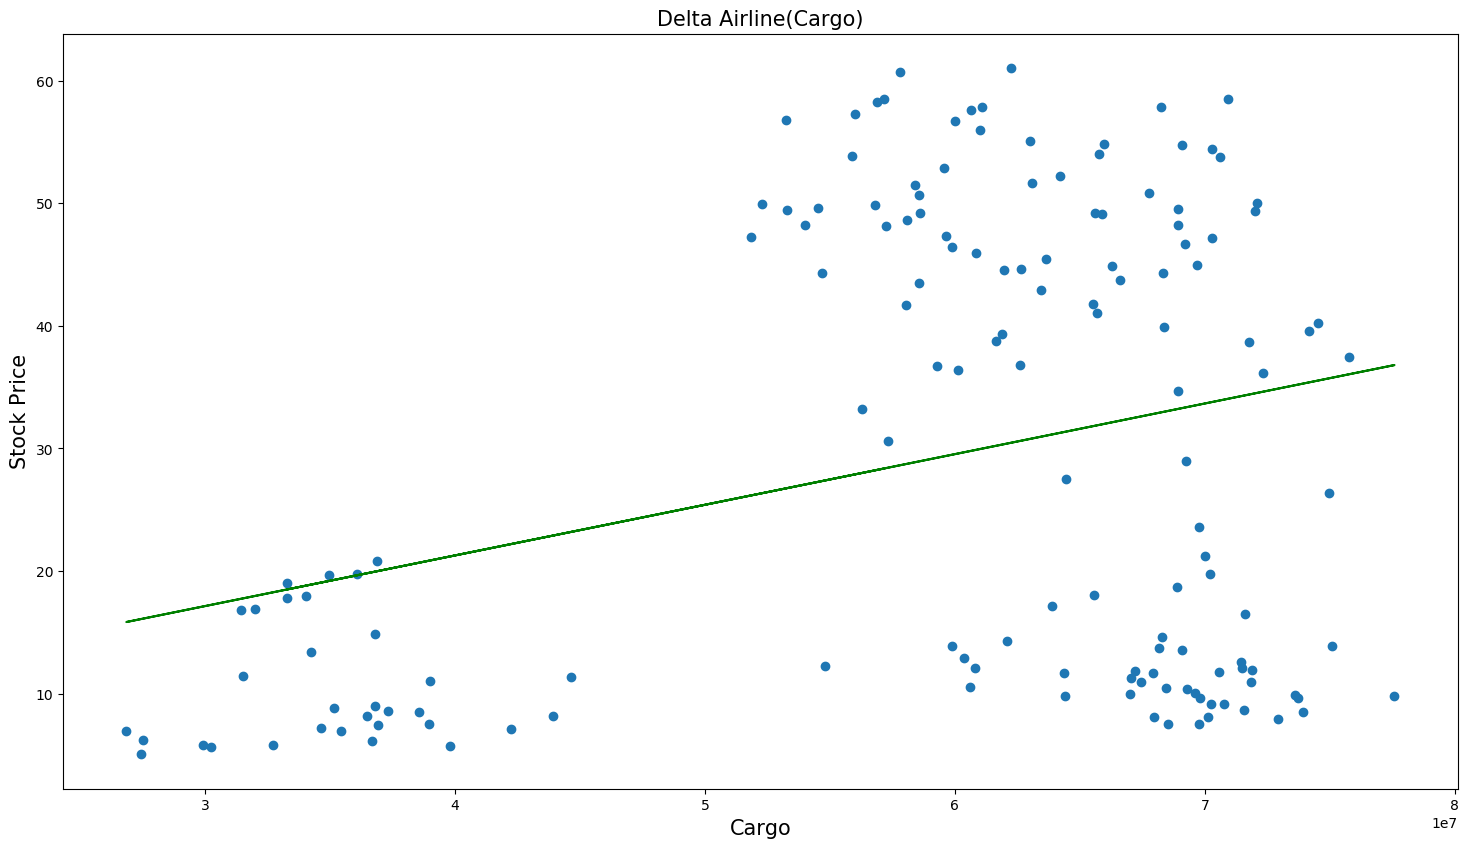

In [26]:
what = 'Freight'
y_value = stockdata['Price'].values[0:152]
x_value = table_Deltaair[dt_between].loc[::-1][what].values[0:152]
line = LinearRegression()
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('Delta Airline(Cargo)', fontsize = 15)
plt.xlabel('Cargo', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [27]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.45
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           0.000209
Time:                        21:48:29   Log-Likelihood:                -655.01
No. Observations:                 152   AIC:                             1314.
Df Residuals:                     150   BIC:                             1320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7390      6.569      0.721      0.472      -8.240      17.718
x1          4.132e-07   1.09e-07      3.801      0.000    1.98e-07    6.28e-07
==============================================================================
Omnibus:                      262.937   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.855
Skew:                           0.098   Prob(JB):                      0.00162
Kurtosis:                       1.589   Cond. No.                     2.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

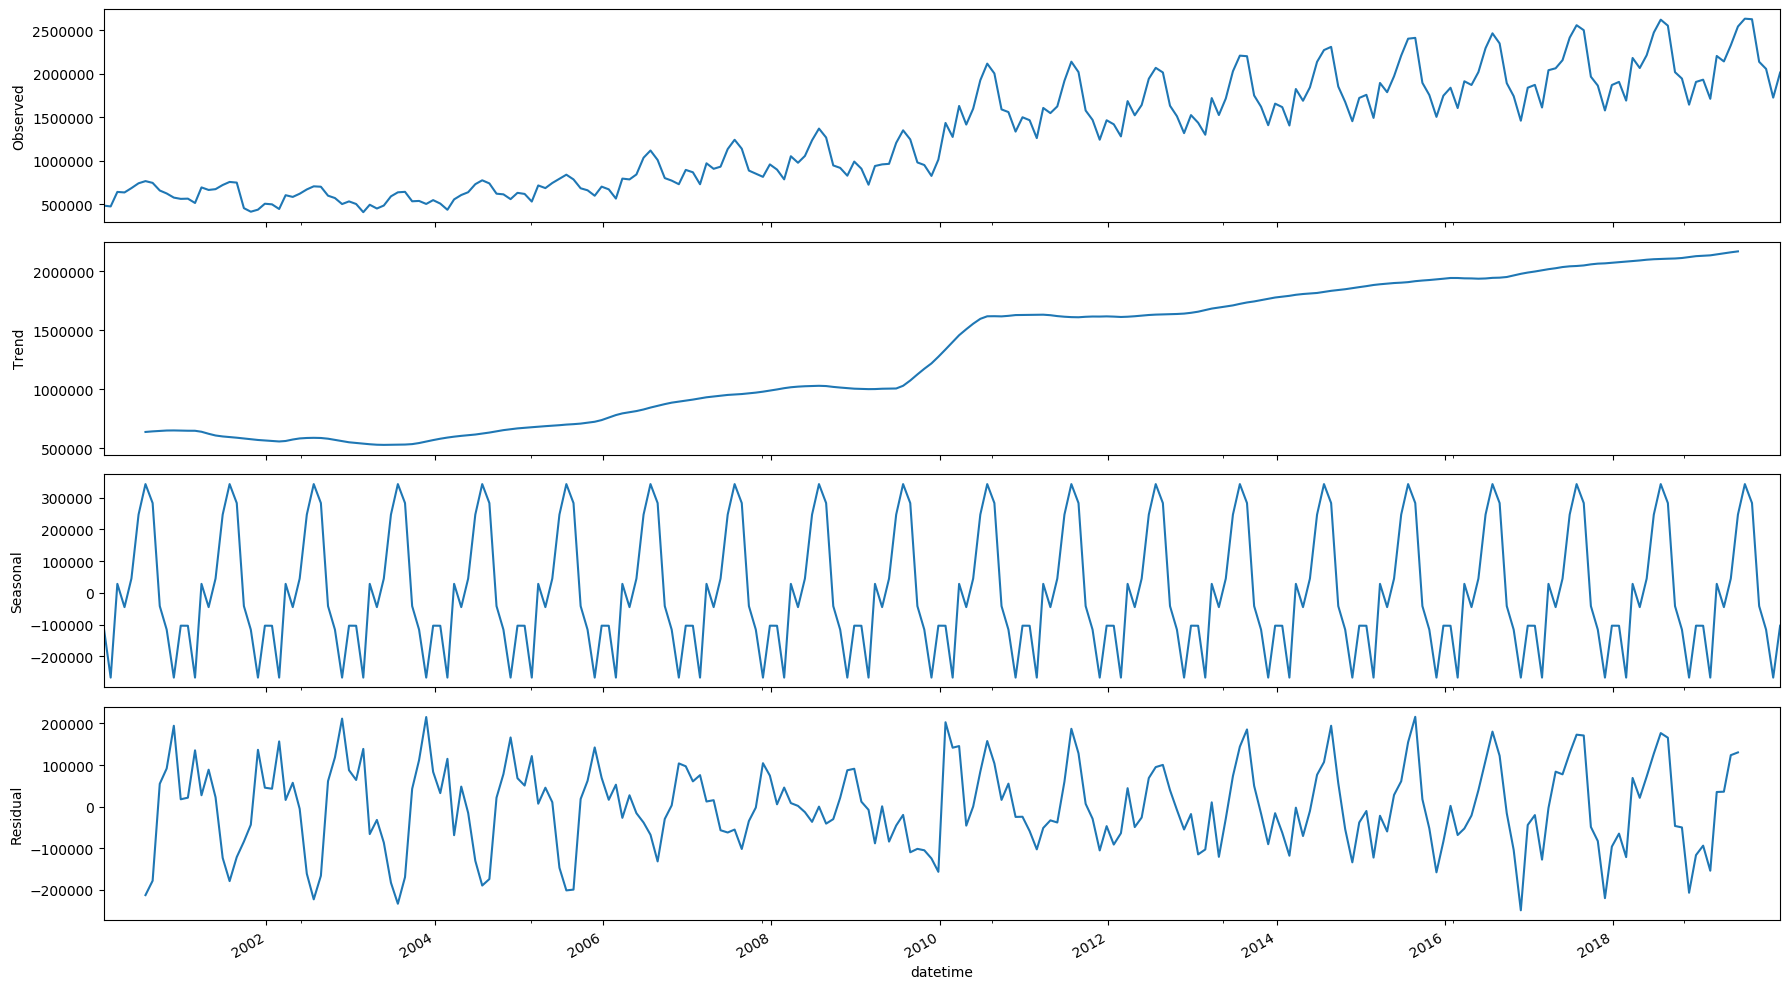

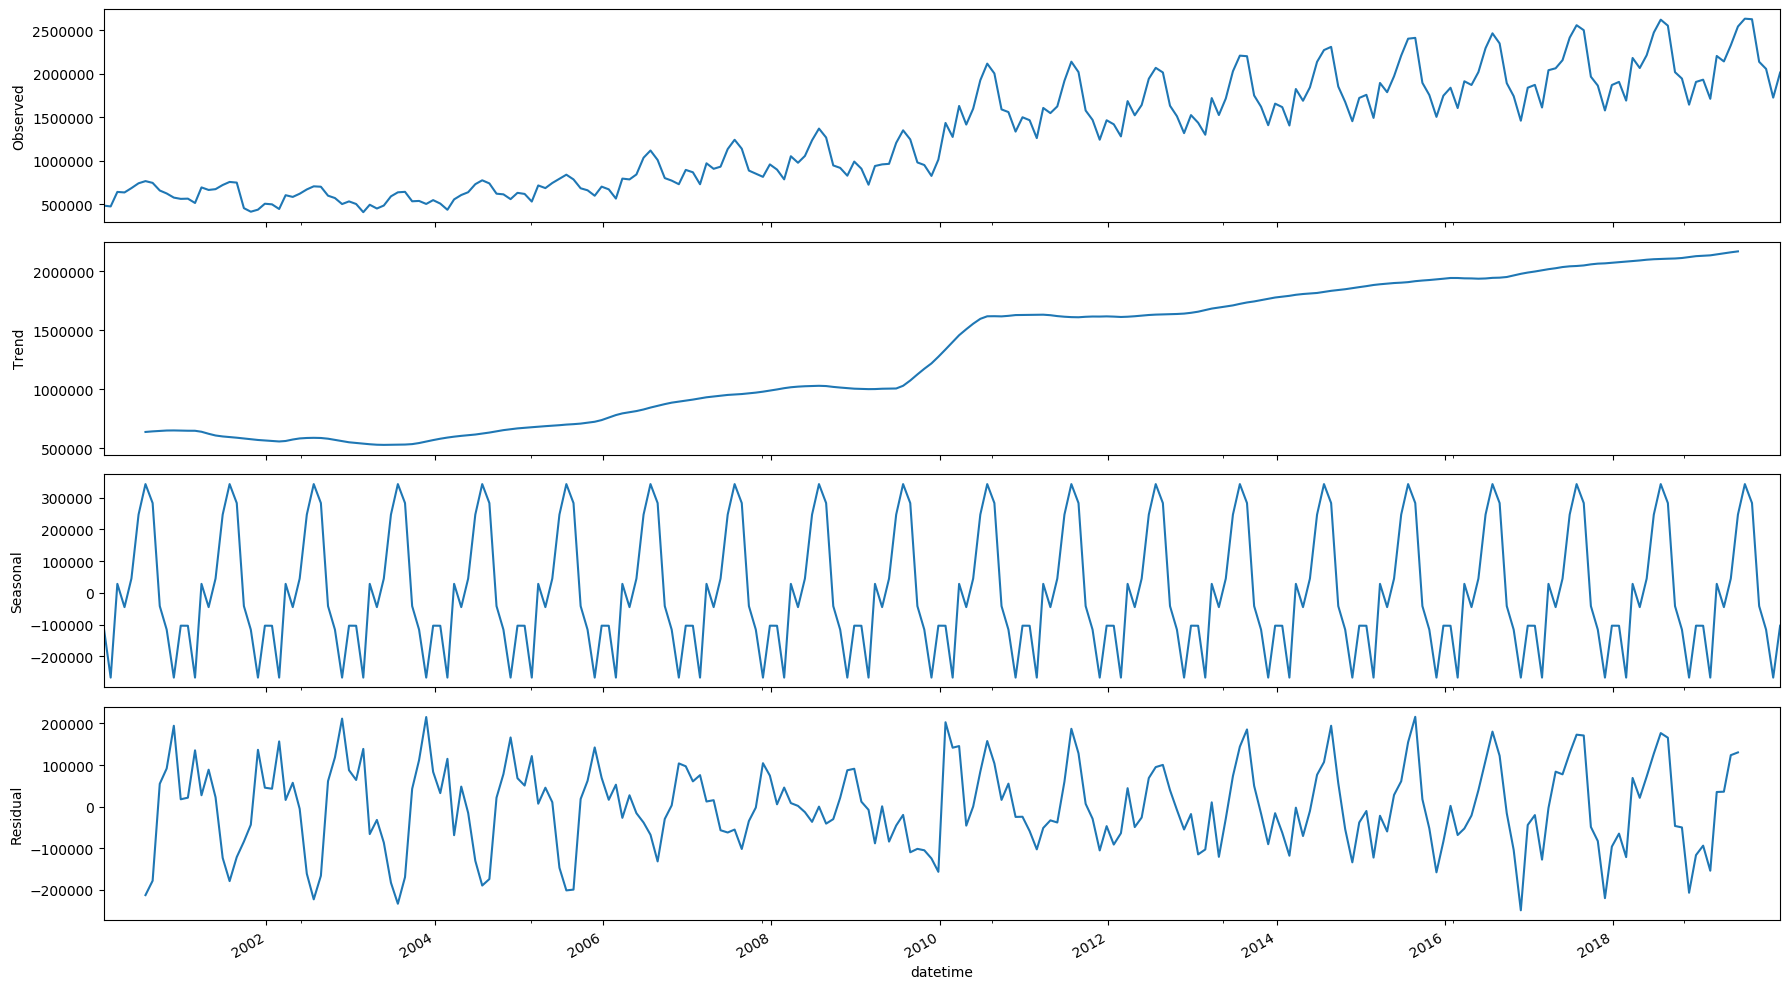

In [28]:
what = 'Passenger'
temp = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['datetime'],columns = [what])
ts_Deltaair = temp[temp[what] !=0]
rcParams['figure.figsize'] = 18, 10
rcParams['figure.dpi'] = 100
decomposition = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12)
decomposition.plot()

In [29]:
temp = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12).trend
table_trend = temp[temp[what].notnull()]
newdate = []
for i in range(len(stockdata['Date'])):
    date = ''
    for j in range(len(stockdata['Date'][i].split())):
        if j == 2:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
stockdata['newdate'] = newdate
datetime = []
for i in range(len(stockdata['Date'])):
    datetime.append(pd.to_datetime(stockdata['newdate'][i], format='%Y-%m-%d'))
stockdata['datetime'] = datetime
stockdata.head()
price = []
date = []
for i in range(len(table_trend)):
    if stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].size != 0:
        price.append(stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].values)          
        date.append(table_trend.index[i])
chart_info = pd.DataFrame(price, index = date, columns = ['Price'])
chart_info[what] = table_trend[what]
chart_info.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\{} {}.xlsx'.format(company,what))

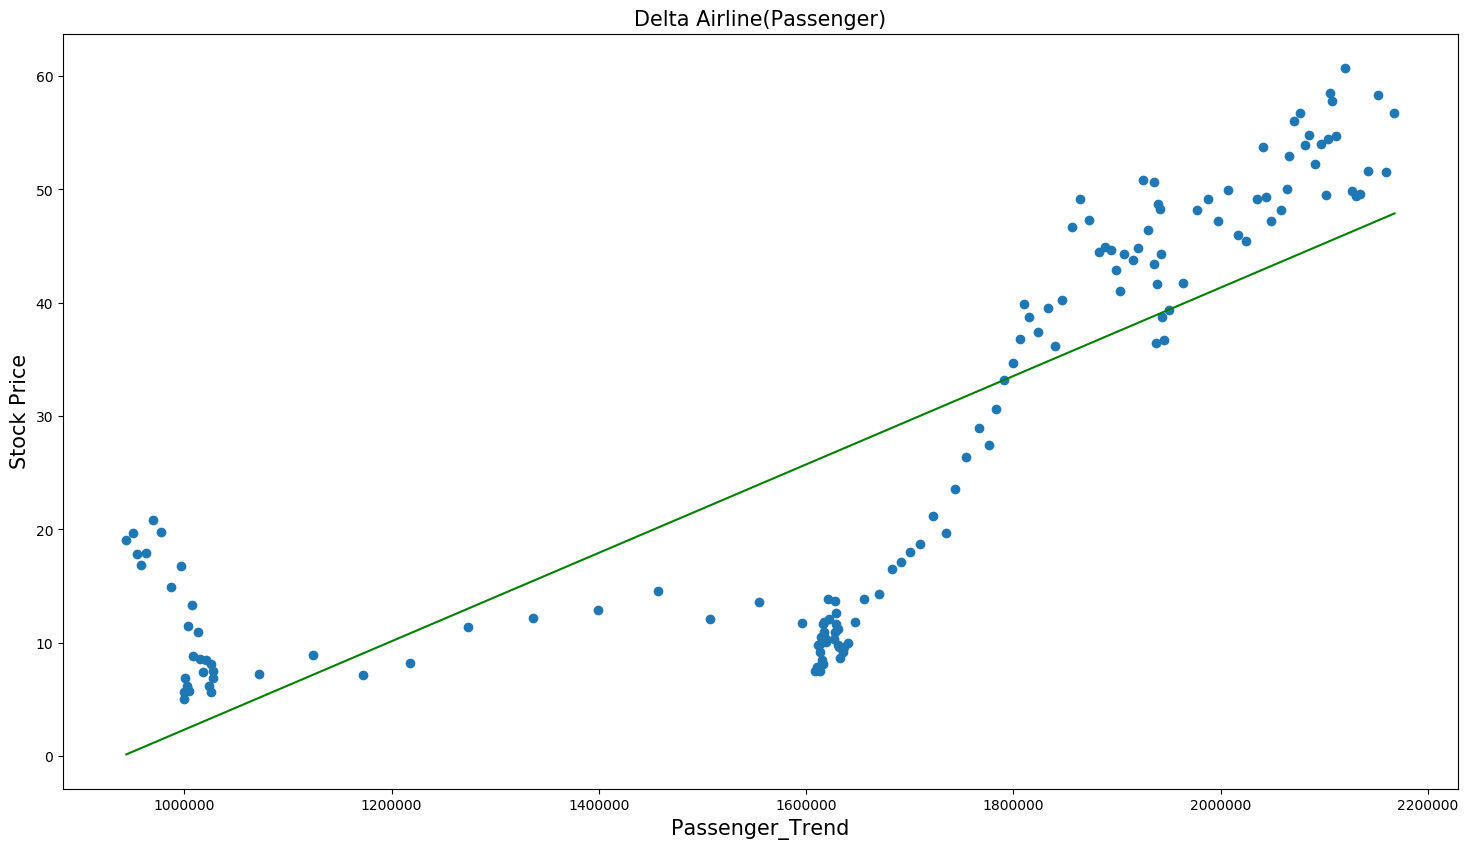

In [30]:
line = LinearRegression()
y_value = chart_info['Price']
x_value = chart_info[what].values
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('Delta Airline(Passenger)', fontsize = 15)
plt.xlabel('{}_Trend'.format(what), fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [31]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     273.1
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           4.50e-35
Time:                        21:48:32   Log-Likelihood:                -553.76
No. Observations:                 146   AIC:                             1112.
Df Residuals:                     144   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6708      4.008     -9.150      0.000     -44.592     -28.749
x1          3.901e-05   2.36e-06     16.527      0.000    3.43e-05    4.37e-05
==============================================================================
Omnibus:                       31.869   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.202
Skew:                          -0.381   Prob(JB):                      0.00609
Kurtosis:                       1.953   Cond. No.                     7.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
dt_min = table_Deltaair['Date'] >= stockdata.tail(1)['Date'].values[0]
dt_max = table_Deltaair['Date'] <= stockdata.head(1)['Date'].values[0]
dt_between = dt_min & dt_max

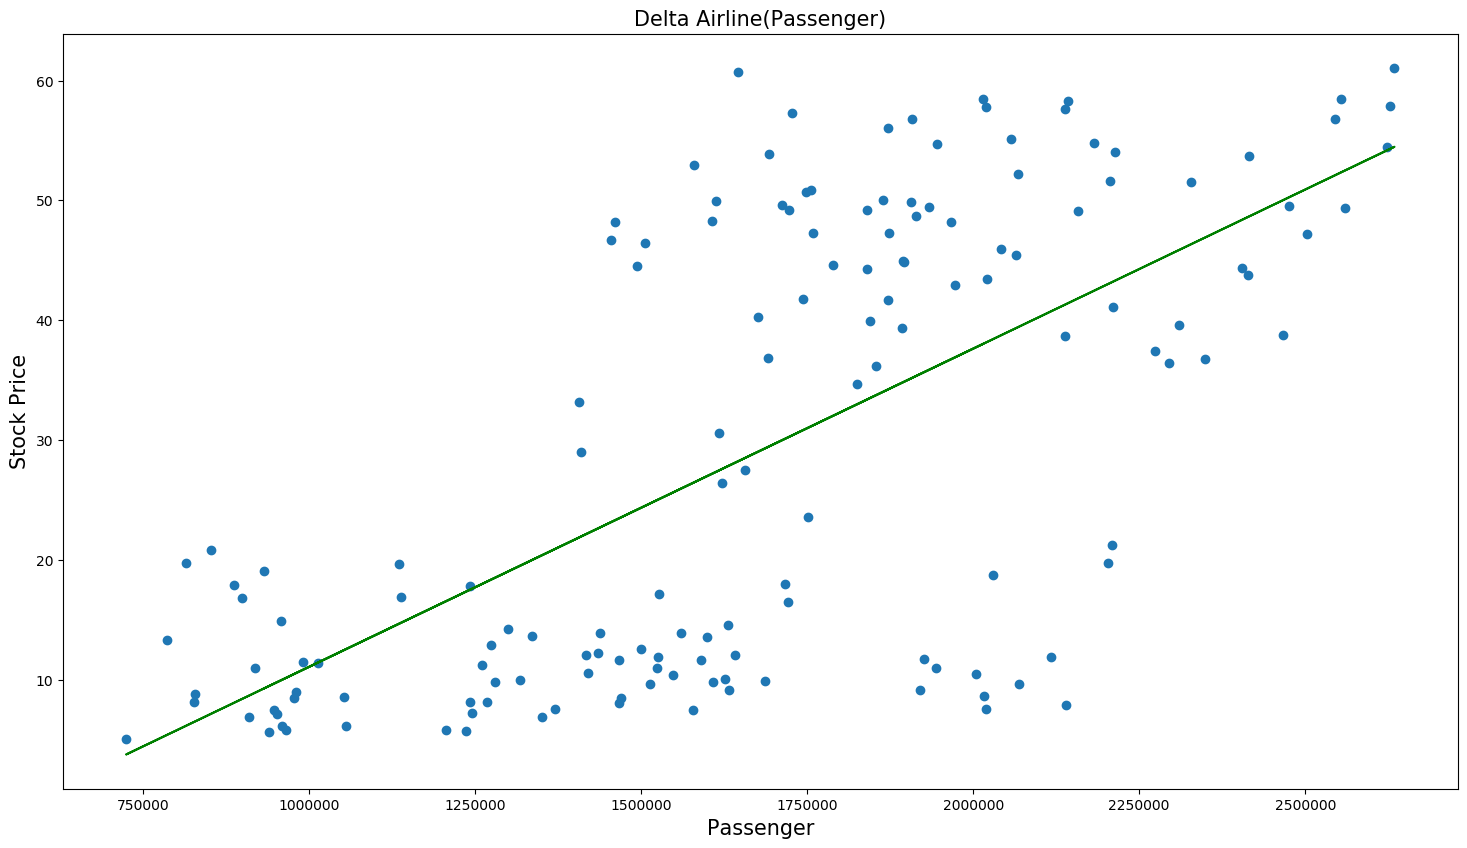

In [33]:
what = 'Passenger'
y_value = stockdata['Price'].values[0:152]
x_value = table_Deltaair[dt_between].loc[::-1][what].values
line = LinearRegression()
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('Delta Airline({})'.format(what), fontsize = 15)
plt.xlabel('{}'.format(what), fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [34]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     115.1
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           2.78e-20
Time:                        21:48:32   Log-Likelihood:                -618.73
No. Observations:                 152   AIC:                             1241.
Df Residuals:                     150   BIC:                             1247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.4549      4.309     -3.586      0.000     -23.970      -6.940
x1          2.654e-05   2.47e-06     10.728      0.000    2.17e-05    3.14e-05
==============================================================================
Omnibus:                        4.588   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.748
Skew:                          -0.102   Prob(JB):                        0.253
Kurtosis:                       2.373   Cond. No.                     6.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""